<a href="https://colab.research.google.com/github/Es-YES-Ye/Python/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%ED%99%95%EB%A5%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

확률

In [2]:
import enum, random
class Coin(enum.Enum):
  FRONT = 0
  BACK = 1
  def random_coin():
    return random.choice([Coin.FRONT, Coin.BACK])

In [3]:
for _ in range(20):
  if Coin.random_coin() == Coin.FRONT:
    print(".", end=' ')
  else:
    print("1", end=' ')

. 1 1 . 1 . . . 1 . 1 . 1 1 1 . 1 . . 1 

만약에 동전을 두 번 던졌을 때

P(both | first)와 P(both | either)를 구하시오

P(both | first) : 첫번째 던졌을 때 앞면이 나오고 둘 다 앞면이 나올 확률

P(both | either) : 둘 중 하나가 앞면이 나오고 둘 다 앞면이 나올 확률

In [4]:
both_back = 0 #둘 다 뒷면
first_back = 0 #첫 번째 뒷면이 나온 횟수
either_back = 0 #둘 중 하나는 뒷면이 나온 횟수

for _ in range(10000):
  first = Coin.random_coin()
  second = Coin.random_coin()
  if first == Coin.BACK:
    first_back +=1
  if first == Coin.BACK and second == Coin.BACK:
    both_back +=1
  if first == Coin.BACK or second == Coin.BACK:
    either_back +=1
print("P(both|first)", both_back/first_back)
print("P(both|either)", both_back/either_back)

P(both|first) 0.49779116465863454
P(both|either) 0.3310630341880342


균등분포와 누적분포

In [5]:
def uniform_pdf(x): #균등분포
  if 0<=x<1:
    return 1
  return 0

In [6]:
def uniform_cdf(x): #누적분포
  if x<0:
    return 0
  if x<1:
    return x
  return 1

In [7]:
xs = []
pys = []
cys=[]
#-1~2Rkwl step=0.01로 균등 분포와 누적 분포를 계산하여 컬렉션에 보관
for x_100 in range(-100,200):
  pys.append(uniform_pdf(x_100/100))
  cys.append(uniform_cdf(x_100/100))
  xs.append(x_100/100)

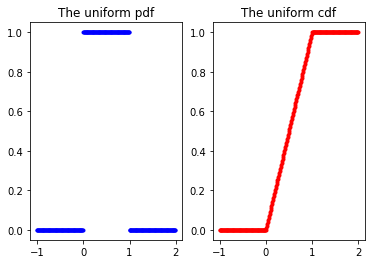

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2)
ax[0].plot(xs, pys, "b.", label="pdf")
ax[1].plot(xs, cys, "r.", label="cdf")
ax[0].set_title("The uniform pdf")
ax[1].set_title("The uniform cdf")
plt.show()

정규분포

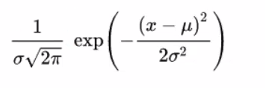

In [9]:
import math
SQRT_TWO_PI = math.sqrt(2*math.pi)
def normal_pdf(x, mu=0, sigma = 1): #정규분포 (mu:평균, sigma:표준편차)
  pre = 1/(sigma*SQRT_TWO_PI)
  post = math.exp(-((-x-mu)**2)/(2*(sigma**2)))
  return pre * post

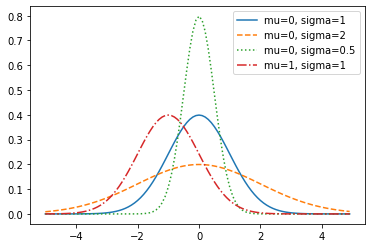

In [10]:
xs = [x/10.0 for x in range(-50,50)]
ys1 = [normal_pdf(x, sigma=1) for x in xs]
ys2 = [normal_pdf(x, sigma=2) for x in xs]
ys3 = [normal_pdf(x, sigma=0.5) for x in xs]
ys4 = [normal_pdf(x, mu=1) for x in xs]
plt.plot(xs,ys1,'-', label="mu=0, sigma=1")
plt.plot(xs,ys2,'--', label="mu=0, sigma=2")
plt.plot(xs,ys3,':', label="mu=0, sigma=0.5")
plt.plot(xs,ys4,'-.', label="mu=1, sigma=1")
plt.legend()
plt.show()

정규누적분포

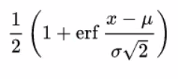

In [11]:
def normal_cdf(x, mu=0, sigma=1): #정규누적분포
  return (1+math.erf((x-mu)/(sigma*math.sqrt(2))))/2

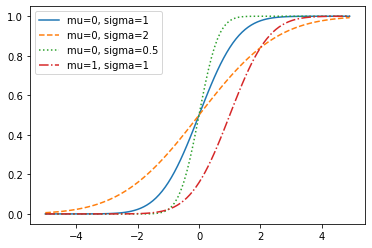

In [12]:
xs = [x/10.0 for x in range(-50,50)]
ys1 = [normal_cdf(x, sigma=1) for x in xs]
ys2 = [normal_cdf(x, sigma=2) for x in xs]
ys3 = [normal_cdf(x, sigma=0.5) for x in xs]
ys4 = [normal_cdf(x, mu=1) for x in xs]
plt.plot(xs,ys1,'-', label="mu=0, sigma=1")
plt.plot(xs,ys2,'--', label="mu=0, sigma=2")
plt.plot(xs,ys3,':', label="mu=0, sigma=0.5")
plt.plot(xs,ys4,'-.', label="mu=1, sigma=1")
plt.legend()
plt.show()

베르누이 시행

In [13]:
def bernouli_trial(p):
  return 1 if random.random()<p else 0

In [14]:
cnt=0
for _ in range(100):
  re = bernouli_trial(1/6)
  print(re, end= '.') #확률이 1/6인 사건이 발생하면 1, 발생하지 않으면 0 출력
  if re == 1:
    cnt+=1
print()
print(cnt)

1.1.0.0.0.1.0.0.0.0.0.1.1.0.0.0.0.0.1.0.0.0.0.0.0.0.0.0.0.1.0.0.0.1.0.0.0.0.1.0.0.0.0.0.0.1.0.0.0.0.0.0.0.0.0.0.0.1.0.0.0.0.0.0.0.1.0.0.1.1.0.0.1.0.0.0.0.0.0.0.0.1.0.1.0.0.1.1.0.0.0.0.0.0.0.0.0.0.0.0.
19


In [15]:
def binomial(n,p):
  return sum(bernouli_trial(p) for _ in range(n))

In [16]:
for _ in range(20):
  print(binomial(100, 1/6), end='.') #주사위를 100번 던졌을 때 숫자 1이 나올 횟수
  

16.24.21.12.18.22.12.19.18.13.14.14.21.17.16.18.20.29.11.17.

In [17]:
from collections import Counter

In [18]:
def binomial_histogram(p,n,nps): # p:확률, n:시도할 횟수, nps:(p,n)을 시도할 횟수
  data = [binomial(n,p) for _ in range(nps)]
  #print(data)
  #print(len(data))
  histogram = Counter(data)
  #print(histogram.values())
  #print(histogram.keys())
  #print([v/nps for v in histogram.values()])
  mu = p*n
  sigma=math.sqrt(n*p*(1-p))
  xs=range(min(data), max(data)+1)
  ys = [normal_cdf(i+0.5, mu, sigma)-normal_cdf(i-0.5,mu,sigma) for i in xs]
  #ys2=[normal_cdf(i, mu, sigma) for i in xs]

  plt.bar(histogram.keys(),[v/nps for v in histogram.values()],color='r')
  plt.plot(xs,ys)
  plt.title("Binomial Distribution and Normal Approximation") #이항 분포와 정규 근사
  plt.show()
  #plt.plot(xs,ys2)
  #plt.show()

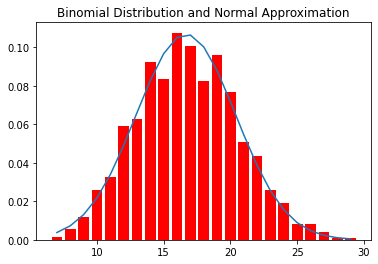

In [19]:
binomial_histogram(1/6, 100, 1200)

주사위를 100번 던졌을 때 1이 나오는 횟수가 40~60일 확률은 얼마인가?

1.8594733114202317e-15 1.7388409084649688e-20
-1.859455923011147e-15


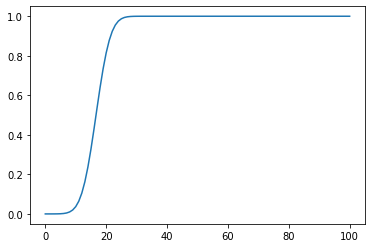

In [40]:
p=1/6
n=100
mu = p*n #평균(기대값)
sigma = math.sqrt(n*p*(1-p))
c1 = normal_pdf(13, mu=mu, sigma=sigma)
c2 = normal_pdf(18, mu=mu, sigma=sigma)
print(c1, c2)
print(c2-c1)
xs = [x for x in range(101)]
ys = [normal_cdf(x,mu=mu,sigma=sigma) for x in xs]
plt.plot(xs,ys)


로지스틱 회귀

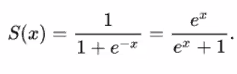

In [21]:
import numpy as np
def sigmoid(x): #시그모이드 함수, 로지스틱 함수와 같은 함수이다.
  return 1/(1+np.e**(-x))

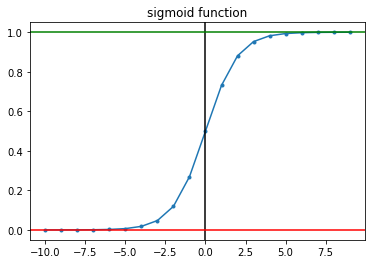

In [22]:
xs = range(-10, 10)
ys = [sigmoid(x) for x in xs]
plt.plot(xs, ys, marker = '.')
plt.axvline(x=0, color='black')
plt.axhline(y=0, color='red')
plt.axhline(y=1, color='green')
plt.title("sigmoid function")
plt.show()

In [23]:
def gradient(y,x,w,b):
  wd = x*(sigmoid(w*x*b)-y)
  bd = (sigmoid(w*x+b)-y)
  return wd, bd

In [24]:
#가중치와 편향 구하기
def gradient_descent(xs, ys, lr=0.0001, epochs=100):
  if isinstance(xs, list):
    xs = np.array(xs).reshape(-1)
  wbhl = [] #학습 과정에서의 가중치의 편향을 보관하기 위함

  wp = np.random.uniform(-1,1) #초기 가중치를 랜덤하게 결정
  bp = np.random.uniform(-1,1) #초기 편향

  for epoch in range(epochs):
    for i,x in enumerate(xs):
      wd,bd = gradient(ys[i],x,wp,bp) #경사를 구함
      wp = wp - (wd*lr) #가중치를 경사*lr 만큼 빼줌(곡선의 아래 부분으로 이동)
      bp = bp - (bp*lr) #편향을 경사*lr만큼 빼줌(곡선의 아래 부분으로 이동)
    wbhl.append([wp, bp])
    return wp, bp, wbhl



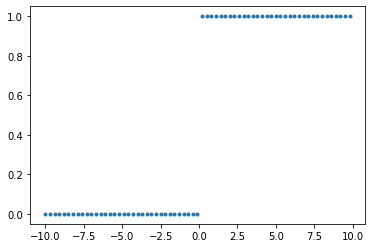

In [25]:
xs = np.arange(-10,10,0.3)
ys = np.array([1 if x>0 else 0 for x in xs])
plt.plot(xs,ys,'.')
plt.show()

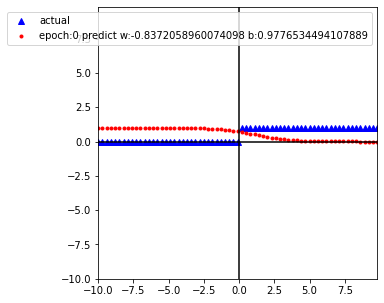

In [26]:
xs = np.arange(-10,10,0.3)
ys = np.array([1 if x>0 else 0 for x in xs])

wp, bp, wbhl = gradient_descent(xs,ys,epochs=1000)

min_val = min(min(xs),min(ys))
max_val = max(max(xs),max(ys))

for wi in range(0, len(wbhl), 50):
  w, b = wbhl[wi]
  #pre_ys = [sigmoid(wb[0]*x+wb[1]) for x in xs]
  pre_ys = [sigmoid(w*x+b) for x in xs]
  plt.figure(figsize=(5,5))
  plt.plot(xs,ys,'b^',label='actual') #실제값을 도면에 뿌림
  plt.plot(xs,pre_ys,'r.',label=f"epoch:{wi} predict w:{w} b:{b}")
  plt.axvline(x=0, color='black')
  plt.axhline(y=0, color='black')
  plt.xlim(min_val, max_val)
  plt.ylim(min_val, max_val)
  plt.legend()
  plt.show()

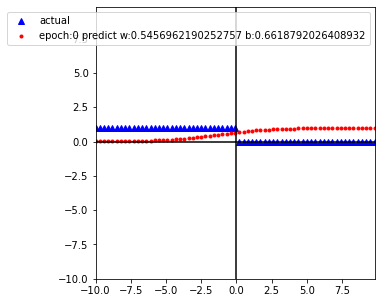

In [27]:
xs = np.arange(-10,10,0.3)
ys = np.array([0 if x>0 else 1 for x in xs])

wp, bp, wbhl = gradient_descent(xs,ys,epochs=1000)

min_val = min(min(xs),min(ys))
max_val = max(max(xs),max(ys))

for wi in range(len(wbhl)):
  if wi>5 and wi%50!=0:
    continue
  w, b = wbhl[wi]
  pre_ys = [sigmoid(w*x+b) for x in xs]
  plt.figure(figsize=(5,5))
  plt.plot(xs,ys,'b^',label='actual') #실제값을 도면에 뿌림
  plt.plot(xs,pre_ys,'r.',label=f"epoch:{wi} predict w:{w} b:{b}")
  plt.axvline(x=0, color='black')
  plt.axhline(y=0, color='black')
  plt.xlim(min_val, max_val)
  plt.ylim(min_val, max_val)
  plt.legend()
  plt.show()

In [28]:
xs2 = [[x] for x in xs]
xs2

[[-10.0],
 [-9.7],
 [-9.399999999999999],
 [-9.099999999999998],
 [-8.799999999999997],
 [-8.499999999999996],
 [-8.199999999999996],
 [-7.899999999999995],
 [-7.599999999999994],
 [-7.299999999999994],
 [-6.999999999999993],
 [-6.699999999999992],
 [-6.3999999999999915],
 [-6.099999999999991],
 [-5.79999999999999],
 [-5.499999999999989],
 [-5.199999999999989],
 [-4.899999999999988],
 [-4.599999999999987],
 [-4.2999999999999865],
 [-3.999999999999986],
 [-3.699999999999985],
 [-3.3999999999999844],
 [-3.0999999999999837],
 [-2.799999999999983],
 [-2.4999999999999822],
 [-2.1999999999999815],
 [-1.8999999999999808],
 [-1.59999999999998],
 [-1.2999999999999794],
 [-0.9999999999999787],
 [-0.699999999999978],
 [-0.39999999999997726],
 [-0.09999999999997655],
 [0.20000000000002416],
 [0.5000000000000249],
 [0.8000000000000256],
 [1.1000000000000263],
 [1.400000000000027],
 [1.7000000000000277],
 [2.0000000000000284],
 [2.300000000000029],
 [2.60000000000003],
 [2.9000000000000306],
 [3.200

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
train_xs, test_xs, train_ys, test_ys = train_test_split(xs2, ys)

In [31]:
len(xs2), len(ys), len(train_xs), len(test_xs), len(train_ys), len(test_ys)

(67, 67, 50, 17, 50, 17)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr_model = LogisticRegression() #모델 개체 생성
lr_model.fit(train_xs, train_ys) #공부하자
pre_vals = lr_model.predict(test_xs) #예측하라
for i, y in enumerate(test_ys):
  print(f"actual:{y} predict:{pre_vals[i]}")

actual:1 predict:1
actual:1 predict:1
actual:1 predict:1
actual:1 predict:1
actual:0 predict:0
actual:0 predict:0
actual:1 predict:1
actual:0 predict:0
actual:0 predict:0
actual:1 predict:1
actual:0 predict:0
actual:0 predict:0
actual:1 predict:1
actual:0 predict:0
actual:1 predict:1
actual:0 predict:0
actual:0 predict:0


In [34]:
print(lr_model.score(test_xs, test_ys))
print(lr_model.score(test_xs, test_ys))

1.0
1.0


x>5 일 때 99.7% 확률로 1

2x가 2보다 큰 수일 때 90% 확률로 1

0<x<=2 일 때 70% 확률로 1

x<=0일 때 0% 확률로 1



In [35]:
xs = np.arange(-10,10,0.3)
ys1=[]
for x in xs:
  if x>5:
    if np.random.uniform(0,10)>0.03: #0~10 사이의 랜덤한 수가 0.03 보다 크면 
      ys1.append(1)
    else:
     ys1.append(0)
  elif x>2:
    if np.random.uniform(0,10)>1:
      ys1.append(1)
    else:
      ys1.append(0)
  elif x>0:
    if np.random.uniform(0,10)>3:
      ys1.append(1)
    else:
      ys1.append(0)
  else:
    ys1.append(0)

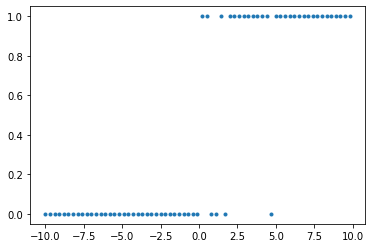

In [36]:
plt.plot(xs,ys1,'.')
plt.show()

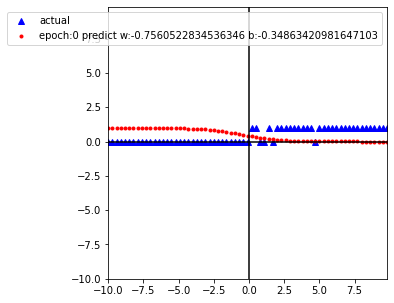

In [37]:
wp, bp, wbhl = gradient_descent(xs,ys1,epochs=1000)

min_val = min(min(xs),min(ys1))
max_val = max(max(xs),max(ys1))

for wi in range(len(wbhl)):
  if wi>5 and wi%50!=0:
    continue
  w, b = wbhl[wi]
  pre_ys = [sigmoid(w*x+b) for x in xs]
  plt.figure(figsize=(5,5))
  plt.plot(xs,ys1,'b^',label='actual') #실제값을 도면에 뿌림
  plt.plot(xs,pre_ys,'r.',label=f"epoch:{wi} predict w:{w} b:{b}")
  plt.axvline(x=0, color='black')
  plt.axhline(y=0, color='black')
  plt.xlim(min_val, max_val)
  plt.ylim(min_val, max_val)
  plt.legend()
  plt.show()